In [20]:
import pandas as pd
from datas import *

year = 2019
list_assets, df_assets = get_hs300_stocks(f'{year}-01-01')
dfs= get_all_date_data(f'{year}-01-01', f'{year+1}-01-01', list_assets)


df_all = dfs[['date', 'asset', "close"]]
df_all['date'] = pd.to_datetime(df_all['date'])
# print(df_all)

close = df_all.pivot(index='date', columns='asset', values='close')
# close.index = pd.to_datetime(close.index)
print(close)

login success!
login respond error_code:0
login respond  error_msg:success
query_hs300 error_code:0
query_hs300  error_msg:success
logout success!
300
asset       000001  000002  000063  000069  000100  000157  000166  000333  \
date                                                                         
2019-01-02    9.19   23.90   19.56    5.97    2.51    3.47    4.04   36.44   
2019-01-03    9.28   24.07   18.78    5.98    2.53    3.52    4.13   36.20   
2019-01-04    9.75   24.93   19.20    6.13    2.57    3.56    4.42   36.99   
2019-01-07    9.74   25.05   20.02    6.19    2.66    3.61    4.38   36.99   
2019-01-08    9.66   25.00   19.90    6.12    2.84    3.63    4.40   36.86   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2019-12-25   16.30   30.29   33.75    7.37    4.48    6.53    4.94   57.20   
2019-12-26   16.47   31.12   33.90    7.53    4.69    6.52    5.01   57.60   
2019-12-27   16.63   31.00   33.64    7.59    4.52    6.54    4.94   

<ipython-input-20-afc9dd85f30c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['date'] = pd.to_datetime(df_all['date'])


                     factor
date       asset           
2019-01-02 000001  0.443507
           000002 -1.420499
           000063  1.934772
           000069  0.521866
           000100 -0.006295
...                     ...
2019-12-31 603799       NaN
           603833 -0.063178
           603858 -0.174342
           603986  2.656157
           603993 -0.663343

[73200 rows x 1 columns]
Dropped 5.0% entries from factor data: 5.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-80.666707,0.303748,-1.703853,2.479631,14020,20.152365
2,-2.230519,0.751298,-0.258269,0.417495,13846,19.902257
3,-1.152752,1.390095,0.019218,0.301881,13867,19.932442
4,-0.634695,2.933007,0.316505,0.448759,13846,19.902257
5,-0.242431,35.951517,1.663533,2.251253,13991,20.110680


Returns Analysis


,1D,5D,10D
Ann. alpha,0.544,0.194,0.034
beta,-0.047,0.093,0.025
Mean Period Wise Return Top Quantile (bps),23.110,16.350,13.447
Mean Period Wise Return Bottom Quantile (bps),-1.699,7.196,9.980
Mean Period Wise Spread (bps),24.809,9.041,3.344


<Figure size 432x288 with 0 Axes>

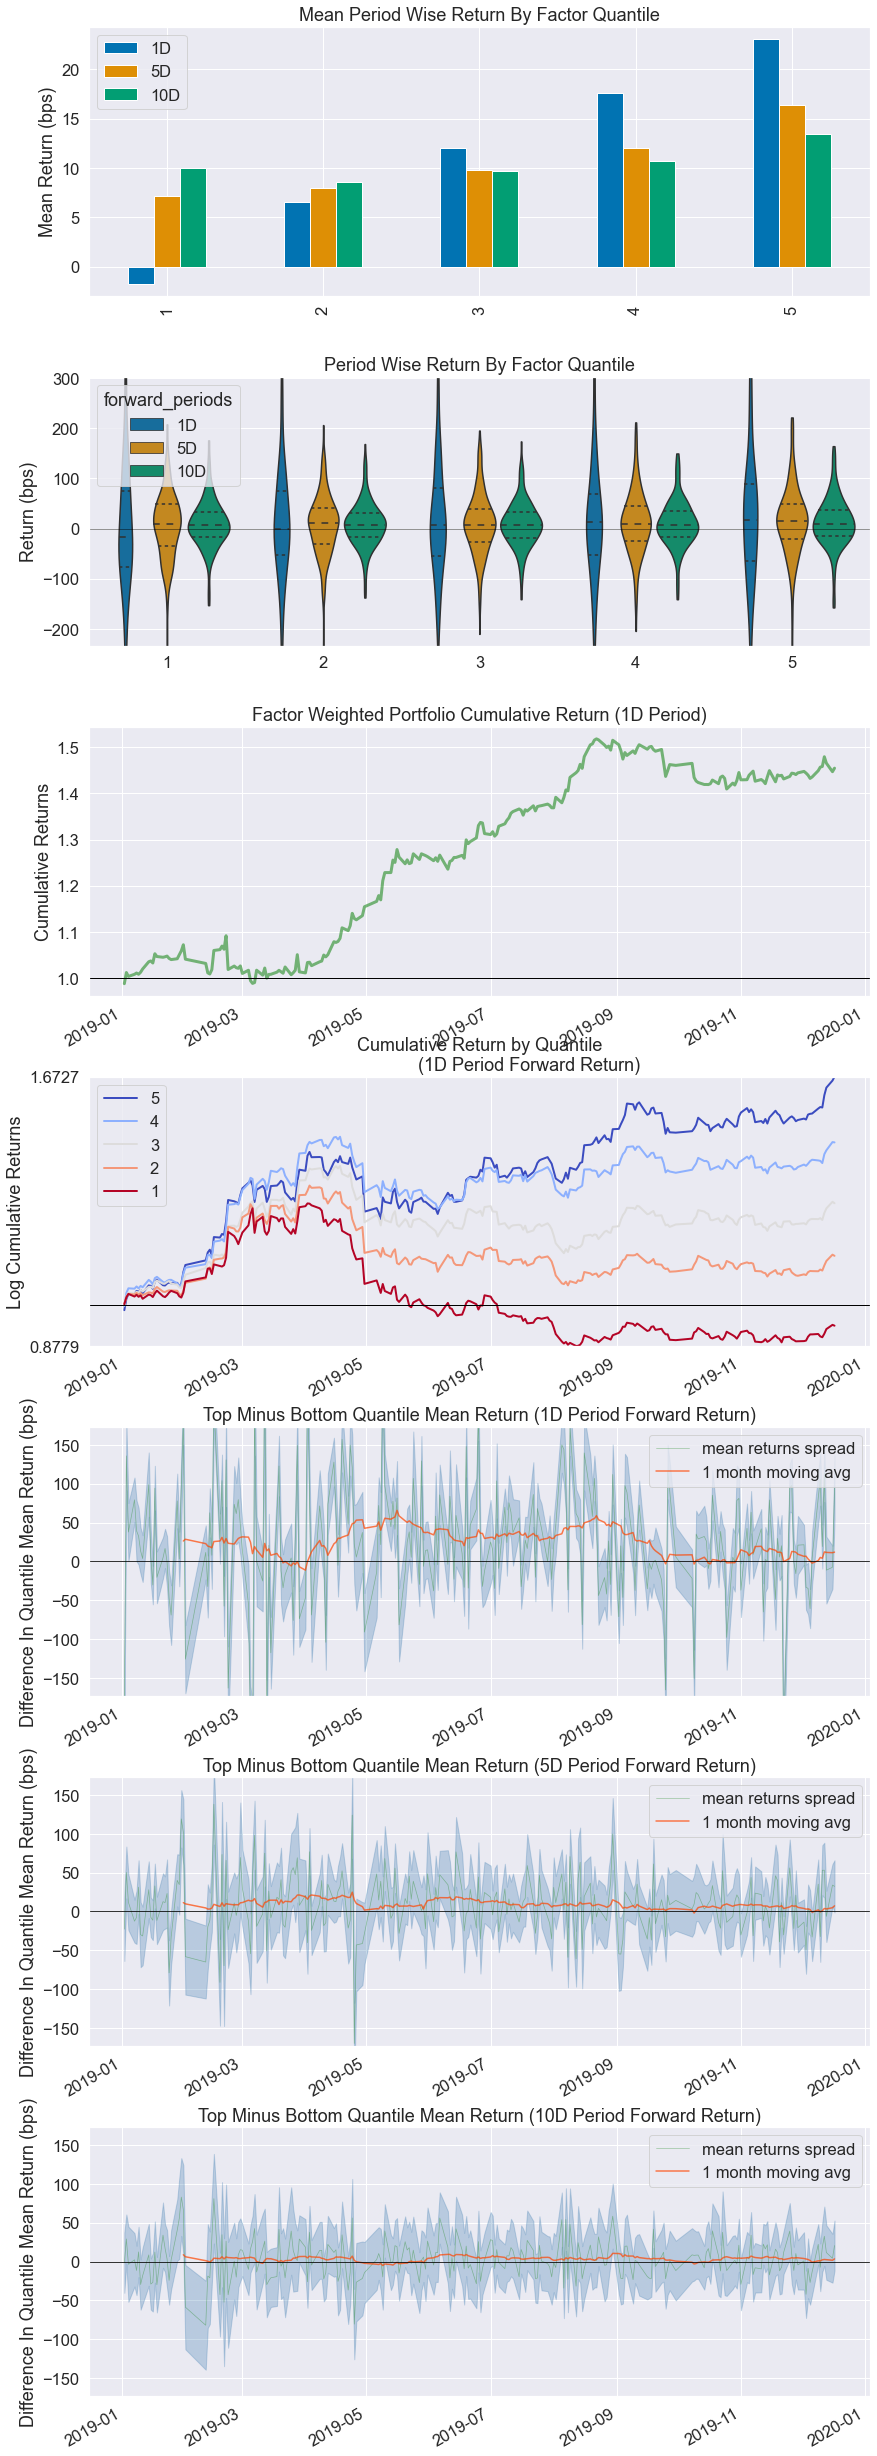

Information Analysis


,1D,5D,10D
IC Mean,0.074,0.044,0.024
IC Std.,0.147,0.148,0.146
Risk-Adjusted IC,0.502,0.297,0.165
t-stat(IC),7.683,4.542,2.525
p-value(IC),0.000,0.000,0.012
IC Skew,-0.209,0.041,0.206
IC Kurtosis,0.355,-0.238,-0.223


d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

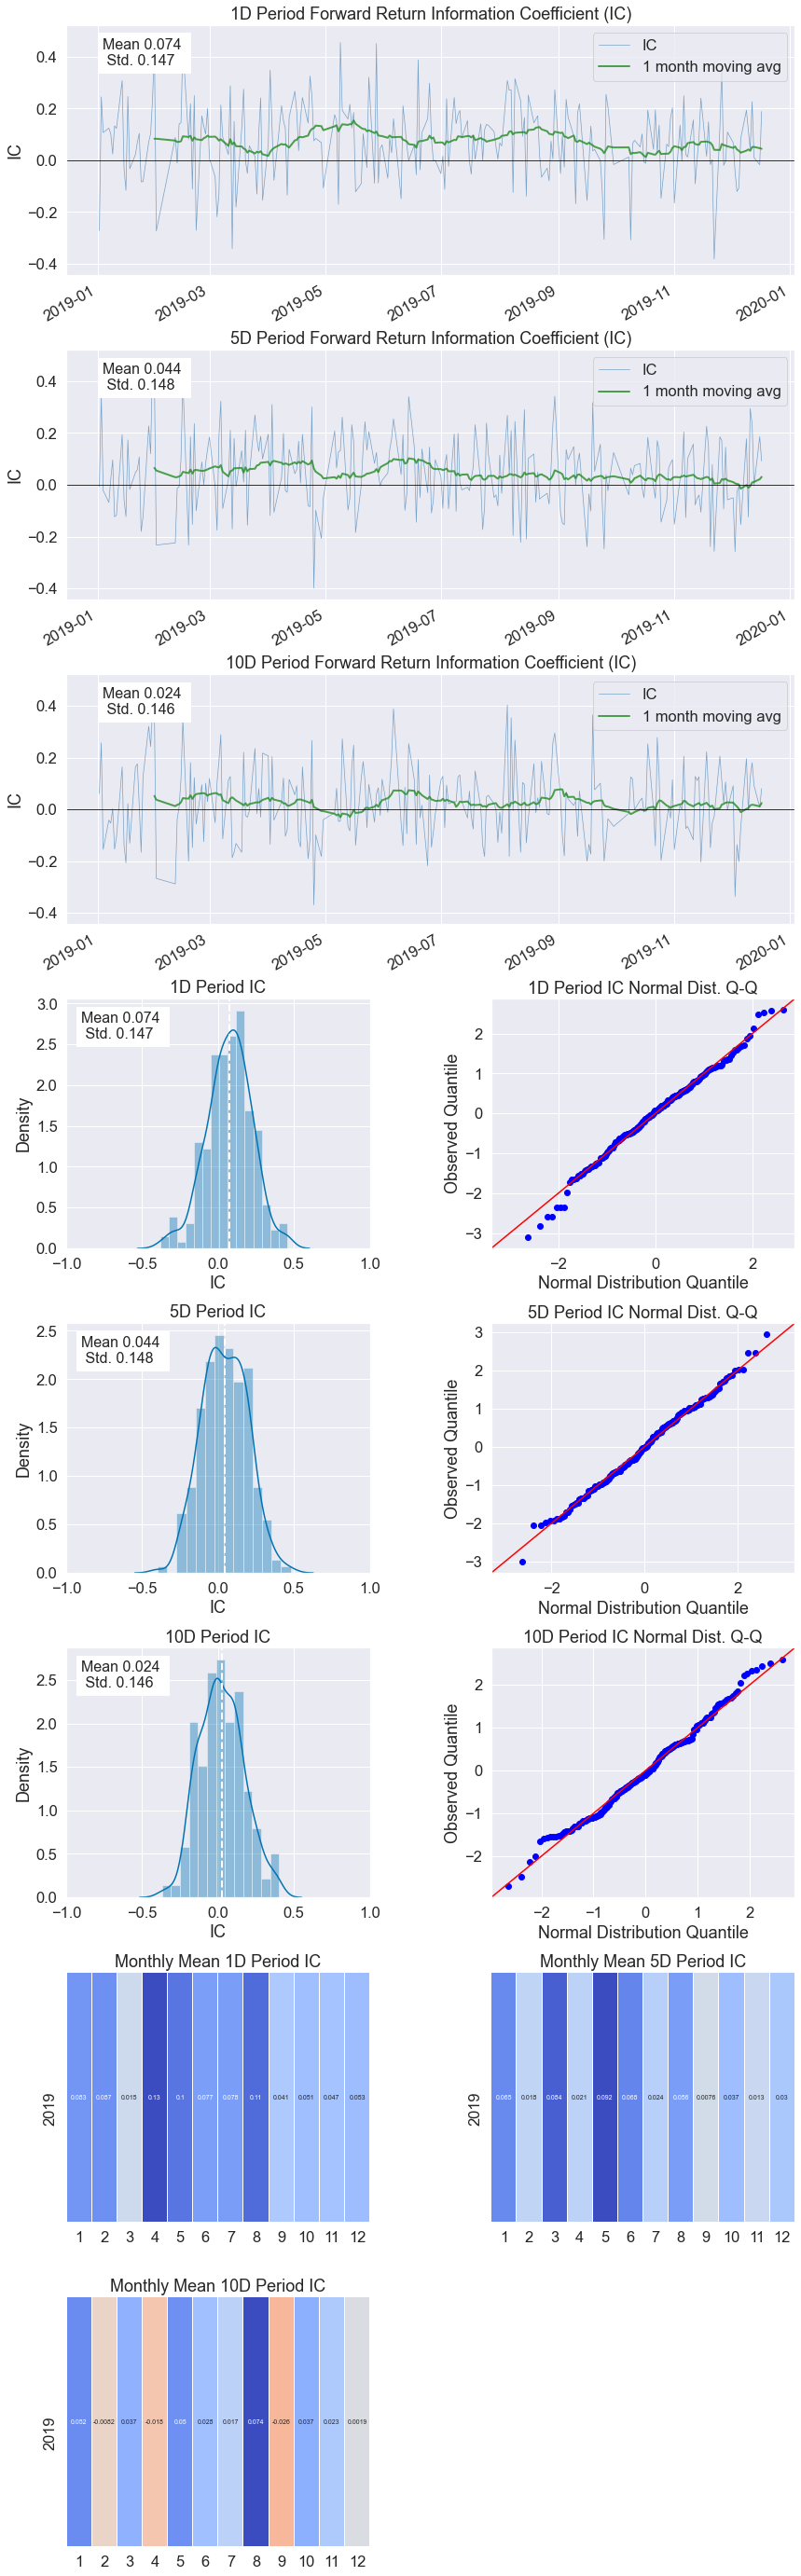

d:\code\StockProject\alphas\alphas\alphalens\utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.750,0.735,0.732
Quantile 2 Mean Turnover,0.790,0.773,0.769
Quantile 3 Mean Turnover,0.743,0.741,0.753
Quantile 4 Mean Turnover,0.793,0.783,0.776
Quantile 5 Mean Turnover,0.743,0.727,0.722


,1D,5D,10D
Mean Factor Rank Autocorrelation,-0.055,-0.001,0.024


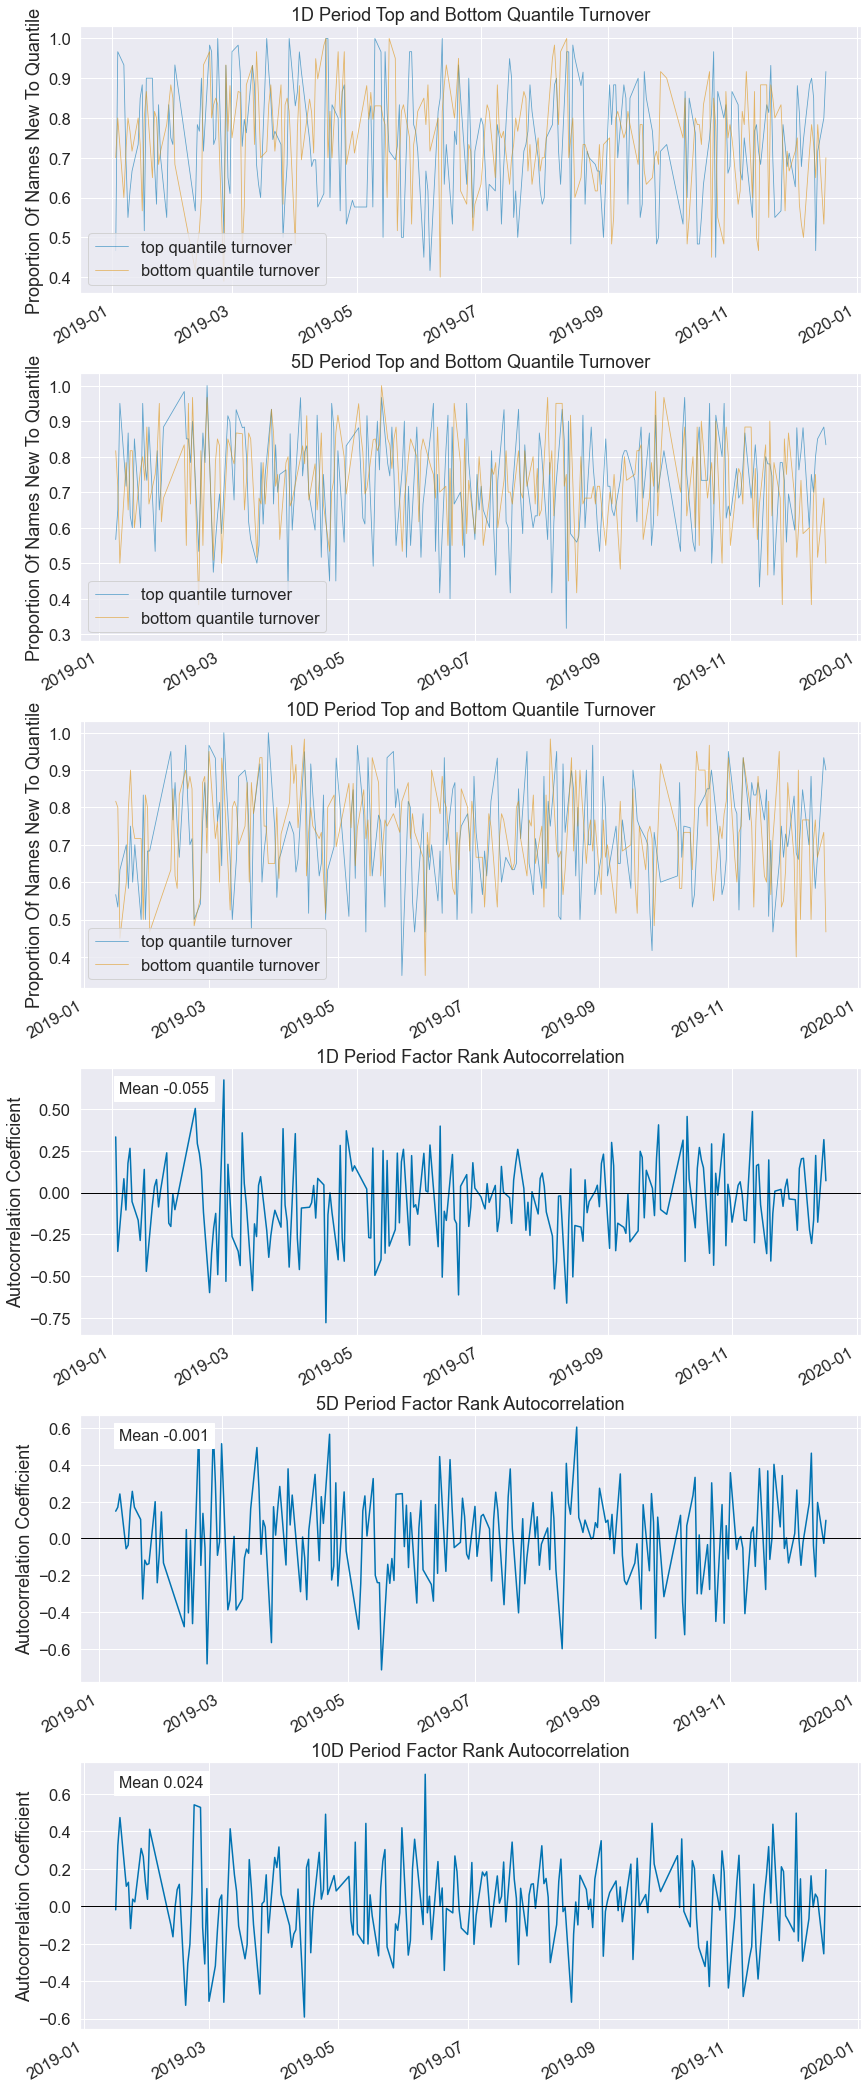

In [21]:
###########################简单现计算的因子#######################################
# alpha = dfs[['date', 'asset', "pctChg"]]
# alpha = alpha.rename(columns={
#         "pctChg": "factor"})
# alpha['date'] = pd.to_datetime(alpha['date'])
# alpha = alpha.set_index(['date', 'asset'], drop=True)
# alpha.sort_index(inplace=True)
# print(alpha)

############################已计算好存在文件中的因子######################################
alpha_num = 114
alpha_name = 'Alphas191'

# 读取已经计算好的因子
alpha = pd.read_csv('alphas/{}/{}/alpha{:03d}.csv'.format(alpha_name, year, alpha_num))

# 筛选出今年的数据，需与股票收盘日期区间一致
alpha = alpha[(alpha['date'] >= f'{year}-01-01') & (alpha['date'] <= f'{year+1}-01-01')]

# 因子矩阵转换为一维数据(alphalens需要的格式)
alpha = alpha.melt(id_vars=['date'], var_name='asset', value_name='factor' )

# date列转为日期格式
alpha['date'] = pd.to_datetime(alpha['date'])
alpha = alpha[['date', 'asset', 'factor']]

# 设置二级索引
alpha = alpha.set_index(['date', 'asset'], drop=True)
alpha.sort_index(inplace=True)
print(alpha)

#############################因子分析#######################################

from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet

ret = get_clean_factor_and_forward_returns(alpha, close,quantiles=5)
create_full_tear_sheet(ret, long_short=False)